In [250]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from datetime import datetime

In [251]:
with open("code/output/all_transf_loss_valid_all2/rolling2007-01-01/pred.pkl.test0", 'rb') as f:
    best_model_preds = pickle.load(f)

In [252]:
# best_model_preds

In [335]:
best_model_predsr = best_model_preds.reset_index()
best_model_predsr1 = best_model_predsr[best_model_predsr['instrument']==1]

In [336]:
best_model_predsr1['year'] = [i[:4] for i in best_model_predsr1['datetime']]

/home/xiaoguang/xinyi/fullgoal/time-selection/ipykernel_41005/738594949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_model_predsr1['year'] = [i[:4] for i in best_model_predsr1['datetime']]


In [337]:
a = best_model_predsr1['label'].reset_index(drop=True)
N = 1
TIR = 0
huanshou = 0
TIR_list = []
for t in range(a.shape[0]):
    Rj = a[t] #a[t+N] / a[t] -1
    TIR += np.sign(Rj)* Rj
    TIR_list.append(TIR)
TIR

7.093860139019171

In [338]:
a = best_model_predsr1['label'].reset_index(drop=True)
N = 1
TIR_hold = 0
TIR_hold_list = []
for t in range(a.shape[0]):
    Rj = a[t] #a[t+N] / a[t] -1
    TIR_hold +=  Rj
    TIR_hold_list.append(TIR_hold)
TIR_hold

0.014629042517981361

In [339]:
b = best_model_predsr1['score'].reset_index(drop=True)
N = 1
TIR_p = 0
TIR_p_list = []
for t in range(a.shape[0]):
    true_Rj = a[t] # a[t+N] / a[t] -1
    pre_Rj = b[t] # b[t+N] / b[t] -1
    TIR_p += np.sign(pre_Rj)* true_Rj
    TIR_p_list.append(TIR_p)
TIR_p

0.4235607157427239

In [342]:
bm = b-b.mean()
N = 1
TIR_p = 0
TIR_p_list = []
for t in range(a.shape[0]):
    true_Rj = a[t] # a[t+N] / a[t] -1
    pre_Rj = bm[t] # b[t+N] / b[t] -1
    TIR_p += np.sign(pre_Rj)* true_Rj
    TIR_p_list.append(TIR_p)
TIR_p

0.34826862248132784

<Axes: >

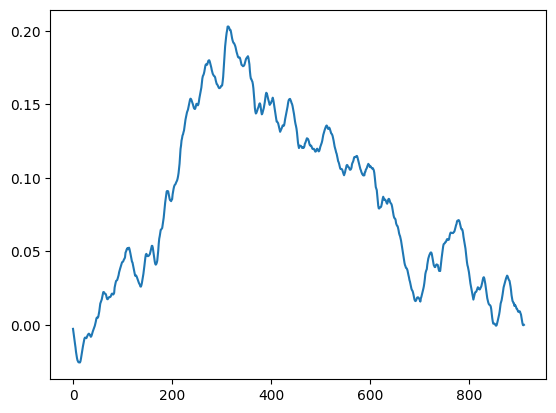

In [344]:
bm.cumsum().plot()

In [308]:
sum((b * b.shift(1)) < 0), len(TIR_p_list)

(62, 911)

Text(0.5, 1.0, '000001')

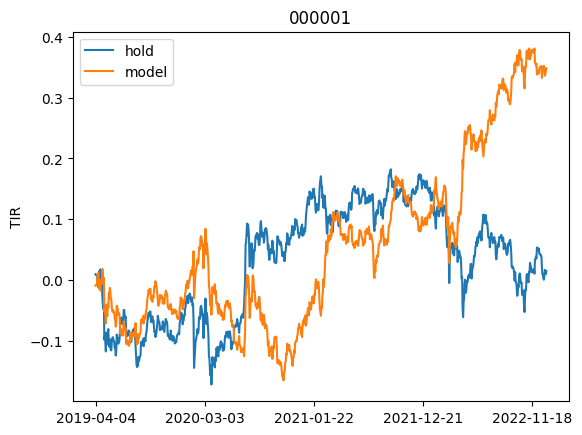

In [343]:
# plt.plot(TIR_list)

plt.plot(best_model_predsr1['datetime'],TIR_hold_list,label='hold')
plt.plot(TIR_p_list,label='model')
plt.xticks(range(1,len(TIR_p_list),220))
plt.legend(loc='best', fontsize = 10)
plt.ylabel('TIR')
plt.title('000001')

In [301]:
for y in [2019,2020,2021,2022]:
    c = best_model_predsr1[best_model_predsr1['year']==str(y)]
    a = c['label'].reset_index(drop=True)
    b = c['score'].reset_index(drop=True)
    TIR_p = 0
    TIR_p_list = []
    TIR_hold = 0
    TIR_hold_list = []
    for t in range(a.shape[0]):
        true_Rj = a[t] # a[t+N] / a[t] -1
        TIR_hold +=  true_Rj
        TIR_hold_list.append(TIR_hold)
        pre_Rj = b[t] # b[t+N] / b[t] -1
        TIR_p += np.sign(pre_Rj)* true_Rj
        TIR_p_list.append(TIR_p)
    print(y,TIR_hold,TIR_p)
    

2019 -0.03237757845818123 -0.023107754177544848
2020 0.1478716470883228 0.11835663620149717
2021 0.04564424947398038 -0.004156479668154134
2022 -0.14650927558614057 0.33246831338692573


In [324]:
best_model_predsr300 = best_model_predsr[best_model_predsr['instrument']==300]

In [325]:
a = best_model_predsr300['label'].reset_index(drop=True)
N = 1
TIR = 0
TIR_list = []
for t in range(a.shape[0]):
    Rj = a[t] #a[t+N] / a[t] -1
    TIR += np.sign(Rj)* Rj
    TIR_list.append(TIR)
TIR

8.419103392732723

In [326]:
a = best_model_predsr300['label'].reset_index(drop=True)
N = 1
TIR_hold = 0
TIR_hold_list = []
for t in range(a.shape[0]):
    Rj = a[t] #a[t+N] / a[t] -1
    TIR_hold +=  Rj
    TIR_hold_list.append(TIR_hold)
TIR_hold

0.03503607343554904

In [327]:
b = best_model_predsr300['score'].reset_index(drop=True)
N = 1
TIR_p = 0
TIR_p_list=[]
for t in range(a.shape[0]):
    true_Rj = a[t] #a[t+N] / a[t] -1
    pre_Rj = b[t] #b[t+N] / b[t] -1
    TIR_p += np.sign(pre_Rj)* true_Rj
    TIR_p_list.append(TIR_p)
TIR_p

0.3163663184768666

<Axes: >

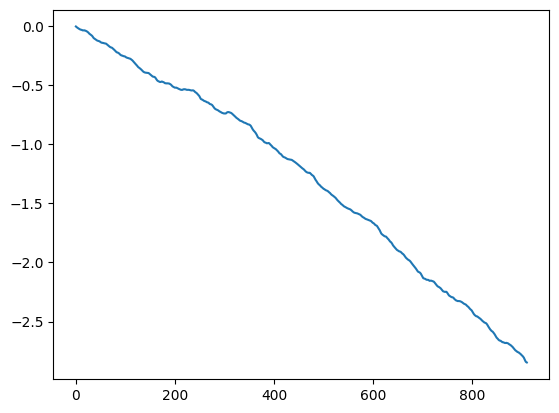

In [328]:
b.cumsum().plot()

In [281]:
sum((b * b.shift(1)) < 0)

42

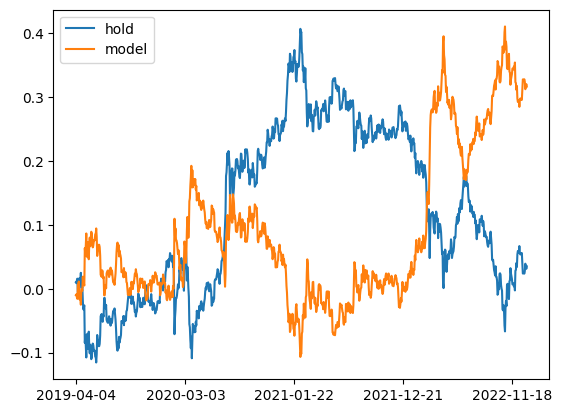

In [282]:
# plt.plot(TIR_list)

plt.plot(best_model_predsr300['datetime'],TIR_hold_list,label='hold')
plt.plot(TIR_p_list,label='model')
plt.xticks(range(1,len(TIR_p_list),220))
plt.legend(loc='best', fontsize = 10)

In [329]:
best_model_predsr905 = best_model_predsr[best_model_predsr['instrument']==905]

In [330]:
a = best_model_predsr905['label'].reset_index(drop=True)
N = 1
TIR = 0
TIR_list=[]
for t in range(a.shape[0]-N):
    Rj =a[t] # a[t+N] / a[t] -1
    TIR += np.sign(Rj)* Rj
    TIR_list.append(TIR)
TIR

8.884287570558172

In [331]:
a = best_model_predsr905['label'].reset_index(drop=True)
N = 1
TIR_hold = 0
TIR_hold_list = []
for t in range(a.shape[0]):
    Rj = a[t] #a[t+N] / a[t] -1
    TIR_hold +=  Rj
    TIR_hold_list.append(TIR_hold)
TIR_hold

0.08834876951141268

In [332]:
b = best_model_predsr905['score'].reset_index(drop=True)
N = 1
TIR_p = 0
TIR_p_list = []
for t in range(a.shape[0]-N):
    true_Rj = a[t]# a[t+N] / a[t] -1
    pre_Rj = b[t] #b[t+N] / b[t] -1
    TIR_p += np.sign(pre_Rj)* true_Rj
    TIR_p_list.append(TIR_p)
TIR_p

0.5802967003705817

In [287]:
sum((b * b.shift(1)) < 0)

108

In [334]:
b.describe()

count    911.000000
mean      -0.001484
std        0.001576
min       -0.006493
25%       -0.002593
50%       -0.001486
75%       -0.000308
max        0.003198
Name: score, dtype: float64

<Axes: >

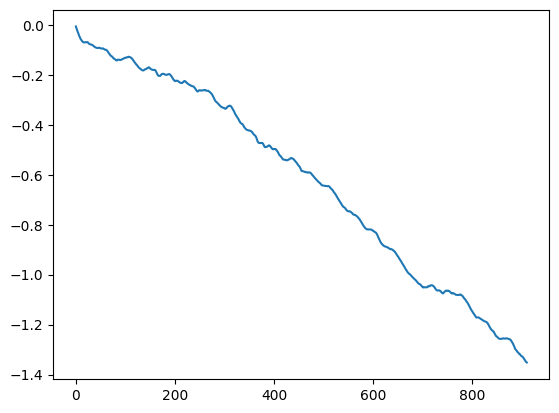

In [333]:
b.cumsum().plot()

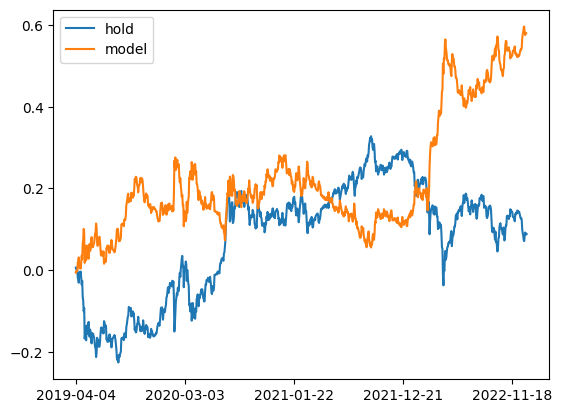

In [288]:
# plt.plot(TIR_list)

plt.plot(best_model_predsr905['datetime'],TIR_hold_list,label='hold')
plt.plot(TIR_p_list,label='model')
plt.xticks(range(1,len(TIR_p_list),220))
plt.legend(loc='best', fontsize = 10)

In [312]:
best_model_predsr852 = best_model_predsr[best_model_predsr['instrument']==852]

In [313]:
a = best_model_predsr852['label'].reset_index(drop=True)
N = 1
TIR = 0
TIR_list=[]
for t in range(a.shape[0]-N):
    Rj = a[t] #a[t+N] / a[t] -1
    TIR += np.sign(Rj)* Rj
    TIR_list.append(TIR)
TIR

10.132076369784954

In [314]:
a = best_model_predsr852['label'].reset_index(drop=True)
N = 1
TIR_hold = 0
TIR_hold_list=[]
for t in range(a.shape[0]):
    Rj = a[t] #a[t+N] / a[t] -1
    TIR_hold +=  Rj
    TIR_hold_list.append(TIR_hold)
TIR_hold

0.11196687951178319

In [315]:
b = best_model_predsr852['score'].reset_index(drop=True)
N = 1
TIR_p = 0
TIR_p_list =[]
for t in range(a.shape[0]-N):
    true_Rj = a[t] #a[t+N] / a[t] -1
    pre_Rj = b[t] # b[t+N] / b[t] -1
    TIR_p += np.sign(pre_Rj)* true_Rj
    TIR_p_list.append(TIR_p)
TIR_p

0.32886936592967686

<Axes: >

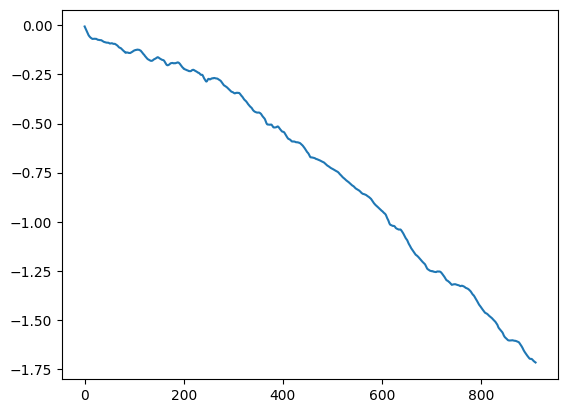

In [317]:
b.cumsum().plot()

In [293]:
sum((b * b.shift(1)) < 0)

82

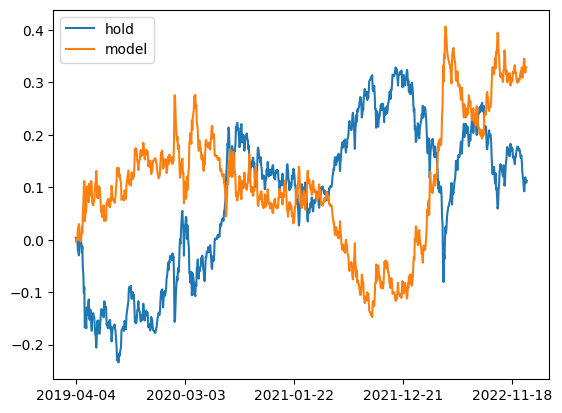

In [294]:
# plt.plot(TIR_list)

plt.plot(best_model_predsr1['datetime'],TIR_hold_list,label='hold')
plt.plot(TIR_p_list,label='model')
plt.xticks(range(1,len(TIR_p_list),220))
plt.legend(loc='best', fontsize = 10)

In [43]:
train = pd.read_csv('test.txt',sep = ',')

In [41]:
train

,Unnamed: 0,STOCK_CODE,END_DATE,PRE_CLOSE,OPEN,HIGH,LOW,CLOSE,VOL,VALUE
0,17282,1,2007-01-04,2675.4740,2728.1880,2847.6150,2684.8180,2715.7190,1.201560e+10,8.394553e+10
1,17283,16,2007-01-04,1805.3140,1842.6330,1924.9220,1821.4760,1836.1360,5.477866e+09,4.247543e+10
2,17284,300,2007-01-04,2041.0470,2073.2500,2139.4940,2054.2420,2067.0920,1.067197e+10,8.238107e+10
3,17285,812,2007-01-04,2206.0340,2231.1800,2264.8210,2212.5300,2216.7500,4.432303e+08,4.114943e+09
4,17286,813,2007-01-04,1801.2970,1813.0200,1831.4070,1809.6610,1812.5980,3.573871e+08,2.365267e+09
...,...,...,...,...,...,...,...,...,...,...
34784,143599,905,2018-12-28,4161.2702,4168.9399,4192.6955,4138.9346,4168.0363,4.996418e+09,3.735006e+10
34785,143600,906,2018-12-28,3182.4577,3187.3392,3215.5579,3173.7507,3199.9371,1.210180e+10,1.154954e+11
34786,143601,922,2018-12-28,3823.9246,3821.5770,3845.8023,3813.4052,3836.8700,2.337531e+09,2.035743e+10
34787,143602,949,2018-12-28,4131.3614,4123.3995,4175.4654,4101.9579,4163.0018,3.652915e+08,4.517808e+09


In [51]:
train['STOCK_CODE'].unique()

array([  1,  16, 300, 812, 813, 852, 905, 906, 922, 949, 982, 861, 859])

In [65]:
for i in train['STOCK_CODE'].unique():
    df = train[train['STOCK_CODE']==i].reset_index(drop=True)
    xs = [datetime.strptime(d, '%Y-%m-%d').date() for d in df['END_DATE']]
    plt.title(str(i)) 
    plt.xlabel('time')   
    plt.ylabel('close') 
    plt.plot(xs,df['CLOSE'])
    plt.savefig('figure/teststock'+str(i)+'.png' )   
    plt.close()  

In [68]:
def plot_and_loss(test_result, index_num, xs):  
    
    plt.title(str(index_num)) 
    plt.xlabel('time')   
    plt.ylabel('close') 
    plt.plot(xs, test_result, label= 'truth')    
    # plt.plot(xs, truth, color="blue", label = 'pred')    
    plt.tick_params(axis='both',which='both')
    # plt.legend(loc="best",ncol=1) #loc="upper right" loc=1, 
    plt.grid(True, which='both')   
    plt.gcf().autofmt_xdate()  # 自动旋转日期标记
    # plt.axhline(y=0, color='k')  
    # return total_loss / i

In [76]:
STOCK_CODE = train['STOCK_CODE'].unique()
fig = plt.figure(figsize=(12,8),dpi=100)
for j in range(9):
    i = STOCK_CODE[j]
    df = train[train['STOCK_CODE']==i].reset_index(drop=True)
    xs = [datetime.strptime(d, '%Y-%m-%d').date() for d in df['END_DATE']]
    plot_and_loss(df['CLOSE'],i,xs)
    plt.subplot(330+j+1)
    # plt.plot(xs,df['CLOSE'])
plt.savefig('figure/stock'+'s'+'.png' )   
plt.close()  

/home/xiaoguang/xinyi/fullgoal/time-selection/ipykernel_35370/1410728037.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(330+j+1)
